In [10]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.circuit import Gate
from math import pi
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import array_to_latex
qc = QuantumCircuit(2)
c = 0
t = 1

<IPython.core.display.Math object>

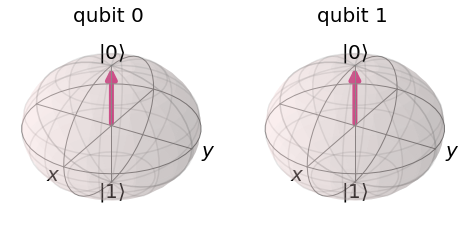

In [13]:
# a controlled-Z
qc.cz(c,t)
qc.draw()
# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

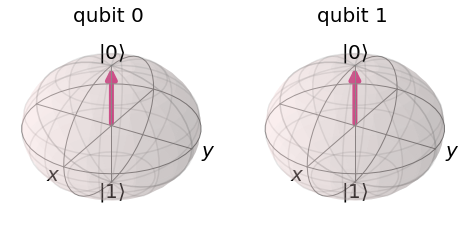

In [14]:
qc = QuantumCircuit(2)
# also a controlled-Z
qc.h(t)
qc.cx(c,t)
qc.h(t)
qc.draw()
# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

<IPython.core.display.Math object>

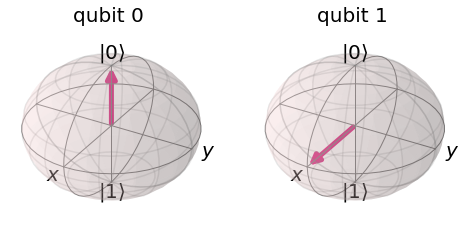

In [19]:
qc = QuantumCircuit(2)
# a controlled-Y
qc.sdg(t)
qc.cx(c,t)
qc.s(t)
qc.h(t)
qc.draw()
# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [6]:
qc = QuantumCircuit(2)
# a controlled-H
qc.ry(pi/4,t)
qc.cx(c,t)
qc.ry(-pi/4,t)
qc.draw()

q_0: ──────────────■───────────────
     ┌──────────┐┌─┴─┐┌───────────┐
q_1: ┤ RY(pi/4) ├┤ X ├┤ RY(-pi/4) ├
     └──────────┘└───┘└───────────┘

In [7]:
a = 0
b = 1

In [8]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.swap(a,b)
qc.draw()

q_0: ─X─
      │ 
q_1: ─X─

In [9]:
qc = QuantumCircuit(2)
# swap a 1 from a to b
qc.cx(a,b) # copies 1 from a to b
qc.cx(b,a) # uses the 1 on b to rotate the state of a to 0
qc.draw()

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘

In [10]:
# swap a q from b to a
qc.cx(b,a) # copies 1 from b to a
qc.cx(a,b) # uses the 1 on a to rotate the state of b to 0
qc.draw()

┌───┐┌───┐     
q_0: ──■──┤ X ├┤ X ├──■──
     ┌─┴─┐└─┬─┘└─┬─┘┌─┴─┐
q_1: ┤ X ├──■────■──┤ X ├
     └───┘          └───┘

In [11]:
qc = QuantumCircuit(2)
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

In [12]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(b,a)
qc.cx(a,b)
qc.cx(b,a)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

In [13]:
qc = QuantumCircuit(2)
# swaps states of qubits a and b
qc.cx(a,b)
qc.cx(b,a)
qc.cx(a,b)
qc.draw()

┌───┐     
q_0: ──■──┤ X ├──■──
     ┌─┴─┐└─┬─┘┌─┴─┐
q_1: ┤ X ├──■──┤ X ├
     └───┘     └───┘

<IPython.core.display.Math object>

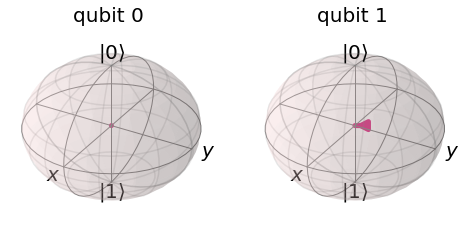

In [23]:
qc = QuantumCircuit(2)
theta = pi # theta can be anything (pi chosen arbitrarily)
qc.h(c)
qc.h(t)
qc.ry(theta/2,t)
qc.cx(c,t)
qc.ry(-theta/2,t)
qc.cx(c,t)
qc.draw()
# Let's see the result
statevector_backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,statevector_backend).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

In [15]:
A = Gate('A', 1, [])
B = Gate('B', 1, [])
C = Gate('C', 1, [])
alpha = 1 # arbitrarily define alpha to allow drawing of circuit

In [16]:
qc = QuantumCircuit(2)
qc.append(C, [t])
qc.cz(c,t)
qc.append(B, [t])
qc.cz(c,t)
qc.append(A, [t])
qc.u1(alpha,c)
qc.draw()

┌───────┐
q_0: ──────■───────■─┤ U1(1) ├
     ┌───┐ │ ┌───┐ │ └─┬───┬─┘
q_1: ┤ C ├─■─┤ B ├─■───┤ A ├──
     └───┘   └───┘     └───┘

In [17]:
qc = QuantumCircuit(3)
a = 0
b = 1
t = 2
# Toffoli with control qubits a and b and target t
qc.ccx(a,b,t)
qc.draw()

q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

In [18]:
qc = QuantumCircuit(3)
qc.cu1(theta,b,t)
qc.cx(a,b)
qc.cu1(-theta,b,t)
qc.cx(a,b)
qc.cu1(theta,a,t)
qc.draw()

q_0: ───────■──────────■───■───
          ┌─┴─┐      ┌─┴─┐ │   
q_1: ─■───┤ X ├─■────┤ X ├─┼───
      │pi └───┘ │-pi └───┘ │pi 
q_2: ─■─────────■──────────■───

In [19]:
qc = QuantumCircuit(3)
qc.ch(a,t)
qc.cz(b,t)
qc.ch(a,t)
qc.draw()

q_0: ──■───────■──
       │       │  
q_1: ──┼───■───┼──
     ┌─┴─┐ │ ┌─┴─┐
q_2: ┤ H ├─■─┤ H ├
     └───┘   └───┘

In [20]:
qc = QuantumCircuit(1)
qc.t(0) # T gate on qubit 0
qc.draw()

┌───┐
q_0: ┤ T ├
     └───┘

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├
     └───┘└───┘└───┘

In [22]:
qc = QuantumCircuit(1)
qc.h(0)
qc.t(0)
qc.h(0)
qc.t(0)
qc.draw()

┌───┐┌───┐┌───┐┌───┐
q_0: ┤ H ├┤ T ├┤ H ├┤ T ├
     └───┘└───┘└───┘└───┘